# Machine Learning Using Torch 

In [9]:
import torch 
import numpy as np
torch.__version__

'1.13.1+cu117'

## Basic Operation

In [16]:
t1 = torch.tensor([1,2],dtype=torch.float64)
t=torch.tensor([[4,0],[5,1]])
t.T

tensor([[4, 5],
        [0, 1]])

#### Compute Derivative

In [24]:
x=torch.tensor(45, dtype=torch.float64, requires_grad=True)
w=torch.tensor(4,  dtype=torch.float64, requires_grad=True)
b=torch.tensor(-1,  dtype=torch.float64, requires_grad=True)

In [25]:
y=w*x+b

In [26]:
y

tensor(179., dtype=torch.float64, grad_fn=<AddBackward0>)

In [27]:
w*x

tensor(180., dtype=torch.float64, grad_fn=<MulBackward0>)

In [28]:
y.backward()

In [33]:
print("dy/dx =", x.grad.numpy())

dy/dx = 4.0


## Random Data Set Generate 

In [58]:
import pandas as pd
import numpy as np

In [59]:
data = pd.DataFrame()
l = ["x1","x2","x3",'x4','x5','y1','y2']
for i in l:
    a = np.random.random(400)*np.random.randint(10,100)
    data[i] = a

In [60]:
data

,x1,x2,x3,x4,x5,y1,y2
0,52.182184,41.627904,4.459416,7.499329,21.168665,12.704384,43.295330
1,28.233527,63.414541,10.764323,27.500480,8.448283,18.709029,9.310562
2,12.361606,9.697637,13.203439,0.351046,23.976839,5.000080,67.566071
3,55.387492,6.326024,13.455946,20.795776,41.910475,6.898300,56.051139
4,51.534909,33.302870,13.722922,38.073290,37.269331,18.874995,58.935487
...,...,...,...,...,...,...,...
395,29.131773,34.510289,5.386075,45.346591,20.135505,2.273774,67.842856
396,10.635184,33.856639,6.618832,4.586325,22.163841,7.752777,25.798967
397,25.290963,1.927816,9.854563,1.493678,21.840680,14.272241,24.339360
398,15.104433,32.932350,12.665629,32.005841,3.203615,4.790377,36.453695


In [61]:
X=data.iloc[:,:5]
Y=data.iloc[:,5:]


In [62]:
trainX,testX,trainY,testY= X[:360],X[360:],Y[:360],Y[360:]

## Simple regression using tensors and manual functions

In [102]:
class Layer:
    def __init__(self,x,y,loss = 'mse'):
        self.b=torch.randn(y.shape[1],dtype=torch.float32, requires_grad=True)
        self.w=torch.randn(y.shape[1], x.shape[1],dtype=torch.float32, requires_grad=True)
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)

        self.preds = self.predict(self.x)
        self.loss = self.mse(self.preds, self.y)
    def predict(self,x):
        return x @ self.w.t() + self.b
    # loss  function
    def mse(self, t1, t2):
        diff = t1-t2
        return torch.sum(diff*diff)/diff.numel()

    def train(self, learning_rate, epoch):
        for i in range(epoch):
            self.preds = self.predict(self.x)
            self.loss = self.mse(self.preds, self.y)
            self.loss.backward()
            with torch.no_grad():
                self.w -= self.w.grad * learning_rate
                self.b -= self.b.grad * learning_rate
                self.w.grad.zero_()
                self.b.grad.zero_()


In [103]:
l=Layer(np.array(trainX),np.array(trainY))

In [ ]:
l.train(.001,100)

NameError: name 'l' is not defined

## simple regression problem using torch builtin functions 

In [43]:
trainX = torch.tensor(np.array(trainX,dtype=np.float32))

In [44]:
trainY = torch.tensor(np.array(trainY, dtype=np.float32))

In [45]:
trainDataSet = torch.utils.data.TensorDataset(trainX,trainY)
len(trainDataSet)

360

In [46]:
trainDataLoader = DataLoader(trainDataSet, 8, shuffle = True)

In [47]:
type(trainDataLoader)

torch.utils.data.dataloader.DataLoader

In [48]:
type(trainDataSet)

torch.utils.data.dataset.TensorDataset

#### Define Model

In [49]:
model = torch.nn.Linear(trainX.shape[1],trainY.shape[1])
model.weight,model.bias

(Parameter containing:
 tensor([[-0.2688,  0.4371,  0.1932,  0.1271,  0.3166],
         [-0.3926,  0.0254,  0.3852,  0.1319,  0.3629]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1395, -0.0720], requires_grad=True))

#### Loss Function
Loss function will be Mean Square Error
```python
torch.nn.functional.mse_loss(Y_hat,Y)
```

#### Optimizer 
Optimizer will be Stochastic Gradient Descent
```python
torch.optim.SGD(model.parameters(), lr = learningRate)
```

In [50]:
learningRate = 1e-4
opt = torch.optim.SGD(model.parameters(), lr = learningRate)

### Model Trainning

In [51]:
def fit(epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

In [52]:
fit(100, model, torch.nn.functional.mse_loss, opt, trainDataLoader)

Epoch [10/100], Loss: 984.1550
Epoch [20/100], Loss: 743.2650
Epoch [30/100], Loss: 636.3225
Epoch [40/100], Loss: 631.0159
Epoch [50/100], Loss: 805.6620
Epoch [60/100], Loss: 1008.4161
Epoch [70/100], Loss: 941.5042
Epoch [80/100], Loss: 875.9270
Epoch [90/100], Loss: 804.7665
Epoch [100/100], Loss: 963.7726


In [57]:
model(torch.from_numpy(np.array(testX,dtype=np.float32)))

tensor([[47.5880, 37.5537],
        [39.8193, 29.1387],
        [30.5908, 29.4113],
        [48.7365, 42.3230],
        [37.5093, 30.6079],
        [35.4119, 31.0394],
        [41.8469, 31.1074],
        [40.4458, 34.2812],
        [37.1181, 31.9289],
        [53.1665, 45.0982],
        [27.4807, 22.6298],
        [36.9428, 26.3339],
        [62.9325, 55.8668],
        [42.1709, 36.8644],
        [25.8524, 21.2684],
        [41.3351, 32.8273],
        [39.7379, 33.6954],
        [14.1356, 13.4719],
        [45.0419, 37.2193],
        [43.1918, 32.4024],
        [38.0157, 30.0797],
        [51.1641, 39.2876],
        [38.1361, 33.7707],
        [36.1845, 24.1835],
        [63.6089, 52.9286],
        [40.7247, 32.9587],
        [38.5916, 28.9941],
        [34.9676, 28.8612],
        [41.7738, 39.6546],
        [34.6163, 33.5595],
        [50.6555, 39.0885],
        [33.5821, 27.5943],
        [59.3944, 48.8417],
        [30.5634, 26.4752],
        [38.5379, 37.6971],
        [51.0921, 43

## Image Clasification Logistic Regression Approach 

In [1]:
# torchvision is image library 
import torchvision 

#### Data Produce

In [2]:
dataset = torchvision.datasets.MNIST(root = 'data/', download=True)

In [3]:
len(dataset), type(dataset)

(60000, torchvision.datasets.mnist.MNIST)

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

#### Ploting Images 

In [6]:
import matplotlib.pyplot as plt

In [14]:
np.asarray(dataset[5][0]).shape

(28, 28)

3


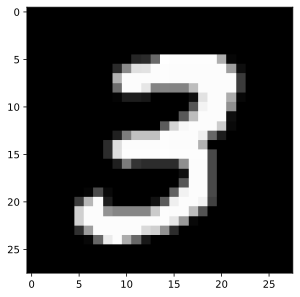

In [20]:
index = np.random.randint(40)
display(plt.imshow(dataset[index][0], cmap = 'gray'))
print(dataset[index][1])

#### Loading data as from wof torch.tensor

In [46]:
dataset = torchvision.datasets.MNIST(root='data/', 
                train=True,
                transform=torchvision.transforms.ToTensor())

In [47]:
dataset[0][0].shape

torch.Size([1, 28, 28])

In [48]:
dataset[0][0].type()

'torch.FloatTensor'

#### Train Validation split 

In [49]:
from torch.utils.data import random_split

In [50]:
train_data, validate_data = random_split(dataset,[50_000,10_000])
len(train_data), len(validate_data)

(50000, 10000)

#### Loading Data on Data Loader 

In [63]:
batch_size = 100
train_data_loader = torch.utils.data.DataLoader(
    train_data, batch_size, shuffle = True)
validate_data_loader = torch.utils.data.DataLoader(
    validate_data, batch_size)

torch.Size([28, 28])


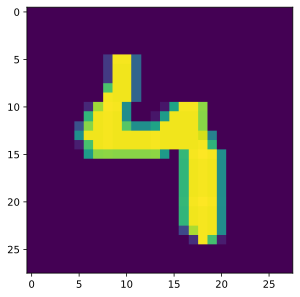

In [62]:
for i in train_data_loader:
    plt.imshow(i[0][5][0])
    print(i[0][1][0].shape)
    break

#### Define Model 

In [64]:
class MnistModel(torch.nn.Module):
    def __init__(self, input_size, num_classes, 
                 loss_fun = torch.nn.MSELoss, optimizer = None):
        super().__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.loss = None
        self.loss_fun = loss_fun
        self.optimizer=optimizer
        
        self.linear = torch.nn.Linear(input_size, num_classes)
    def forward(self, xb):
        xb=xb.reshape(-1, self.input_size)
        out = self.linear(xb)
        return out
    
    

In [65]:
model = MnistModel(784,10)

In [66]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0080,  0.0033, -0.0272,  ..., -0.0218, -0.0059,  0.0288],
         [ 0.0051,  0.0241,  0.0209,  ...,  0.0141,  0.0042, -0.0007],
         [ 0.0268, -0.0119,  0.0287,  ...,  0.0104,  0.0212, -0.0145],
         ...,
         [ 0.0224,  0.0018,  0.0035,  ..., -0.0230, -0.0296, -0.0322],
         [-0.0084, -0.0319, -0.0258,  ...,  0.0256,  0.0211, -0.0177],
         [ 0.0003,  0.0257,  0.0045,  ...,  0.0042, -0.0179,  0.0259]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0298, -0.0310,  0.0096, -0.0339,  0.0010,  0.0261, -0.0125, -0.0138,
          0.0033,  0.0314], requires_grad=True)]

In [67]:
for images, labels in train_data_loader:
    print(images.shape)
    outputs = model(images)
    break


torch.Size([100, 1, 28, 28])
